In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [21]:
dt = pd.read_csv('Book51.csv')
dt

,Type,BU,NV,FU,Urinalysis
0,Yes,25,45,20,10
1,Yes,10,60,15,15
2,Yes,40,40,10,10
3,Yes,15,50,15,20
4,Yes,20,45,25,10
5,Yes,30,50,10,10
6,Yes,5,70,10,15
7,Yes,12,65,13,10
8,Yes,22,42,22,14
9,Yes,25,49,10,16


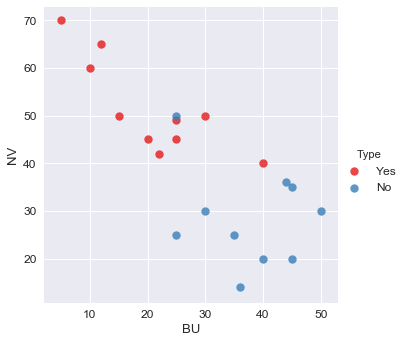

In [6]:
sns.lmplot('BU', 'NV', data=dt, hue='Type',  palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [7]:
character = dt[['BU','NV']].as_matrix()
type_label = np.where(dt['Type']=='Yes', 0, 1)

C:\Users\Naga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
model = svm.SVC(kernel='linear')
model.fit(character, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1] 
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

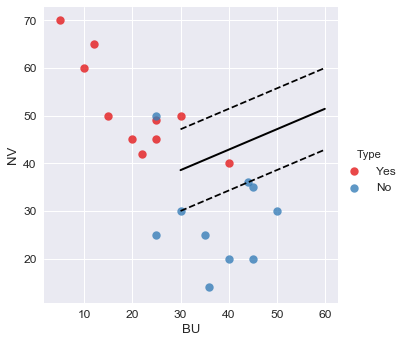

In [11]:
sns.lmplot('BU', 'NV', data=dt, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');


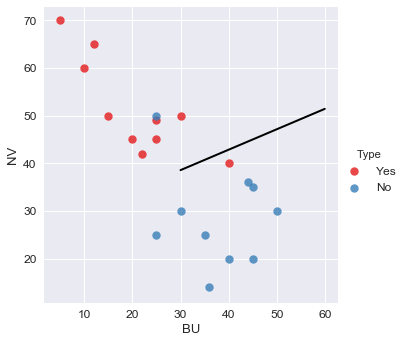

In [13]:
sns.lmplot('BU', 'NV', data=dt, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

In [17]:
def predict_disease(BU, NV):
    if(model.predict([[BU, NV]]))==0:
        print('Take care... His kidney was failed!')
    else:
        print('No Worry....He is healthy!')

In [18]:
predict_disease(24,45)

Take care... His kidney was failed!


In [22]:
predict_disease(25,50)

Take care... His kidney was failed!


In [23]:
predict_disease(36,14)

No Worry....He is healthy!
